# Asignación óptima de tutorías para reducir riesgo académico (Corhuila)
**Unidad 1 · Optimización clásica en IA**  
**Fecha:** 2025-08-09

**Objetivo de la tarea.** Formular y resolver un problema de optimización usando un método clásico (**programación lineal – Simplex**) sobre datos reales de pruebas diagnósticas.

**Clasificación del problema.** Determinista · Lineal (tras linearización) · Con restricciones · Variables continuas.

**Equipo de trabajo:**
- Cindy Liliana Vargas Duque
- Luis Angel Vargas Narvaez
- Jesús Ariel González Bonilla


## 1. Propuesta

<div style="background:#0d3d2c;border:1px solid #1fae74;padding:24px;border-radius:14px;color:#f5fdf9;font-family:system-ui,Segoe UI,sans-serif;box-shadow:0 4px 12px rgba(0,0,0,.35);">
  <h1 style="margin-top:0;font-size:30px;letter-spacing:.5px;color:#4ef5b4;">Asignación Óptima de Tutorías para Mitigar Riesgo Académico</h1>
  <p style="font-size:15px;line-height:1.5;">Este informe interactivo guía paso a paso la <strong>formulación, resolución y análisis</strong> de un problema de optimización lineal aplicado a la gestión de tutorías institucionales. Está diseñado para que alguien sin experiencia previa en optimización comprenda: <em>qué problema resolvemos, cómo lo modelamos, por qué usamos Simplex y qué decisiones produce.</em></p>
  <div style="display:flex;flex-wrap:wrap;gap:14px;margin-top:10px;">
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Datos</h3>
      <p style="margin:0;font-size:13.5px;">Resultados por estudiante en 4 áreas diagnósticas → derivamos conteos de riesgo por cohorte (programa-semestre-área).</p>
    </div>
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Objetivo</h3>
      <p style="margin:0;font-size:13.5px;">Minimizar el total estimado de estudiantes en riesgo asignando horas de tutoría con restricciones de presupuesto, capacidad y equidad.</p>
    </div>
    <div style="flex:1 1 250px;background:#124f39;padding:14px 16px;border-radius:10px;border-left:5px solid #1fae74;">
      <h3 style="margin:0 0 6px 0;font-size:14px;text-transform:uppercase;letter-spacing:.5px;color:#4ef5b4;">Método</h3>
      <p style="margin:0;font-size:13.5px;">Programación Lineal (Simplex / HiGHS). Linearizamos la función de riesgo mediante variables auxiliares.</p>
    </div>
  </div>
  <div style="margin-top:14px;display:flex;flex-wrap:wrap;gap:12px;">
    <div style="flex:1 1 340px;background:#166949;padding:14px 16px;border-radius:10px;">
      <h3 style="margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;">Mapa de Secciones</h3>
      <ol style="margin:4px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;">
        <li>Contexto y Formulación</li>
        <li>Datos y Exploración</li>
        <li>Metodología de Riesgo</li>
        <li>Modelo Lineal</li>
        <li>Solución y Resultados</li>
        <li>Visualizaciones Clave</li>
        <li>Sensibilidad</li>
        <li>Exportación</li>
        <li>Conclusiones y Recomendaciones</li>
      </ol>
    </div>
    <div style="flex:1 1 340px;background:#166949;padding:14px 16px;border-radius:10px;">
      <h3 style="margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;">Cómo Leer</h3>
      <ul style="margin:4px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;">
        <li><strong>Cajas verdes</strong>: definiciones y conceptos.</li>
        <li><strong>Cajas ámbar</strong>: advertencias / supuestos.</li>
        <li><strong>Cajas azul-verde</strong>: interpretación de resultados.</li>
        <li><strong>Bloques clave</strong>: decisiones accionables o insights.</li>
      </ul>
    </div>
  </div>
</div>

## 2. Contexto y formulación matemática
**Contexto.** La Coporración Universitaria del Huila - Corhuila dispone de resultados individuales en cuatro áreas: Lectura Crítica (LC), Competencia Ciudadana (CC), Razonamiento Cuantitativo (RQ) e Inglés (ING). Queremos asignar *horas de tutoría* por **programa–semestre–área** para **minimizar** el número esperado de estudiantes en riesgo.

**Definiciones.** Consideramos "en riesgo" a quienes están por debajo del percentil 40 dentro de su cohorte (programa–semestre) en cada área.

**Modelo (Programación lineal).**
- Conjuntos: $P$ programas; $S$ semestres; $A=\{LC,CC,RQ,ING\}$ áreas.
- Datos: $r_{p,s,a}$ conteo base en riesgo; $H$ presupuesto total de horas; $C_a$ capacidad por área; $k_a$ impacto (reducción esperada de estudiantes en riesgo por cada hora en el área $a$).
- Variables: $x_{p,s,a} \ge 0$ horas de tutoría; $y_{p,s,a} \ge 0$ riesgo posterior estimado.

**Objetivo:** $\min \sum_{p,s,a} y_{p,s,a}$

**Restricciones:**
$y_{p,s,a} \ge r_{p,s,a} - k_a x_{p,s,a}$;  $\sum_{p,s,a} x_{p,s,a} \le H$;  $\sum_{p,s} x_{p,s,a} \le C_a$;  $\sum_{a} x_{p,s,a} \ge h^{\min}_{p,s}$ (equidad, opcional).

Esta linearización implementa $y=\max(r-kx,0)$; minimizar $y$ desplaza horas hacia cohortes/áreas con mayor impacto.

In [57]:
# Imports (añadimos seaborn y estilos enriquecidos)
import pandas as pd
import numpy as np
from pathlib import Path
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus
from pulp import HiGHS_CMD
import matplotlib.pyplot as plt
import seaborn as sns

# Estilos HTML / helpers
try:
    from enhanced_style_boxes import (
        inject_styles, info_box, concept_card, section_block, param_card,
        key_insight, show_formula, flex_columns, create_timeline,
        setup_plot_style, create_heatmap, create_comparison_chart
    )
except ImportError:
    # Fallback mínimo si el archivo no está disponible
    def inject_styles(*args, **kwargs):
        pass
    def info_box(content, **k):
        from IPython.display import HTML; return HTML(f"<div style='background:#111;color:#eee;padding:10px;border-left:4px solid #0a5;'>{content}</div>")
    def setup_plot_style():
        pass

inject_styles()
setup_plot_style()
sns.set_theme(style="darkgrid")

## 3. Carga y preparación de datos
**Nota:** este notebook usa por defecto el archivo subido al entorno. Si lo ejecutas localmente, cambia la ruta a tu archivo.

<div style='background:#124f39;padding:18px 20px;border-radius:12px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>3. Exploración Inicial de Datos</h2>
  <p style='line-height:1.55;font-size:14px;'>Antes de modelar, verificamos la estructura de los datos y generamos <strong>gráficas diagnósticas</strong> para entender la variabilidad y potencial de mejora. Esto refuerza el criterio de la rúbrica sobre <em>comprensión del problema y sus componentes</em>.</p>
  <div style='display:flex;flex-wrap:wrap;gap:18px;margin-top:8px;'>
    <div style='flex:1 1 320px;background:#166949;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;'>Objetivo de esta fase</h3>
      <ul style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Detectar valores faltantes.</li>
        <li>Observar dispersión por área.</li>
        <li>Identificar heterogeneidad entre cohortes.</li>
        <li>Respaldar la posterior definición de riesgo.</li>
      </ul>
    </div>
    <div style='flex:1 1 320px;background:#166949;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;text-transform:uppercase;letter-spacing:.5px;color:#ffcc29;'>Gráficas a generar</h3>
      <ol style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Distribuciones (KDE / histogramas) por área.</li>
        <li>Boxplots comparativos.</li>
        <li>Heatmap de conteos de riesgo (posterior).</li>
      </ol>
    </div>
  </div>
</div>

In [58]:
# Importa data
DATA_PATH = Path("data.xlsx")

assert DATA_PATH.exists(), f"No se encontró el archivo: {DATA_PATH}"

# Hoja
sheet = "Export"
df = pd.read_excel(DATA_PATH, sheet_name=sheet)

# Estandarizar nombres de columnas (sin afectar acentos)
df.columns = [c.strip() for c in df.columns]

# Mostrar un vistazo
display(df.head(5))
print("Filas:", len(df))
print("Columnas:", df.columns.tolist())


PERIODO ESTUDIANTE IDENTIFICACIÓN          NOMBRES            APELLIDOS  \
0   20221    ANTIGUO     1000046418  CRISTIAN CAMILO     BOTACHE ESPINOSA   
1   20221    ANTIGUO     1000062000        VALENTINA  AVENDAÑO VILLANUEVA   
2   20221    ANTIGUO     1000063394     PAULA ANDREA          LEIVA TIQUE   
3   20221    ANTIGUO     1000156473    JAVIER STEVEN         AVILA PLAZAS   
4   20221    ANTIGUO     1000163924    JUAN FERNANDO      OROZCO TRUJILLO   

                           PROGRAMA ACADÉMICO  SEMESTRE  LECTURA CRÍTICA  \
0                INGENIERIA DE SISTEMAS-NEIVA       9.0            230.0   
1              NEGOCIOS INTERNACIONALES-NEIVA       9.0              NaN   
2      MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA       9.0            135.0   
3                  INGENIERIA AMBIENTAL-NEIVA       9.0            128.3   
4  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0              NaN   

  ESCALA LECTURA CRÍTICA  COMPETENCIA CIUDADANA ESCALA COMPETENCIA CIUDADANA  \
0      NIVEL DESEMPEÑO 4                  195.0            NIVEL DESEMPEÑO 3   
1            NO PRESENTÓ                    NaN                  NO PRESENTÓ   
2      NIVEL DESEMPEÑO 2                  120.0            NIVEL DESEMPEÑO 1   
3      NIVEL DESEMPEÑO 2                  195.0            NIVEL DESEMPEÑO 3   
4            NO PRESENTÓ                    NaN                  NO PRESENTÓ   

   RAZONAMIENTO CUANTITATIVO ESCALA RAZONAMIENTO CUANTITATIVO  INGLÉS  \
0                      138.8                NIVEL DESEMPEÑO 2   258.3   
1                        NaN                      NO PRESENTÓ   258.3   
2                        NaN                      NO PRESENTÓ   150.0   
3                      213.8                NIVEL DESEMPEÑO 4   247.9   
4                        NaN                      NO PRESENTÓ     NaN   

  ESCALA INGLÉS  
0            B2  
1            B2  
2            A2  
3            B2  
4   NO PRESENTÓ

Filas: 9698
Columnas: ['PERIODO', 'ESTUDIANTE', 'IDENTIFICACIÓN', 'NOMBRES', 'APELLIDOS', 'PROGRAMA ACADÉMICO', 'SEMESTRE', 'LECTURA CRÍTICA', 'ESCALA LECTURA CRÍTICA', 'COMPETENCIA CIUDADANA', 'ESCALA COMPETENCIA CIUDADANA', 'RAZONAMIENTO CUANTITATIVO', 'ESCALA RAZONAMIENTO CUANTITATIVO', 'INGLÉS', 'ESCALA INGLÉS']


### 3.1. Etiquetado de riesgo por cohorte
Marcamos como riesgo (1) a quienes están bajo el percentil 40 dentro de su **programa–semestre** por área; ignoramos los `NaN` (NO PRESENTÓ). Generamos una tabla de conteos $r_{p,s,a}$.

<div style='background:#166949;padding:16px 18px;border-radius:10px;border:1px solid #1fae74;color:#f5fdf9;'>
<h3 style='margin-top:0;color:#ffcc29;'>Interpretación Exploratoria</h3>
<p style='font-size:14px;line-height:1.5;margin:0 0 10px;'>Las distribuciones permiten observar dónde hay mayor dispersión y potencial de reducción de riesgo. Áreas con <strong>cola más baja pronunciada</strong> y <strong>asimetría</strong> tienden a tener más estudiantes susceptibles de quedar bajo el percentil de corte usado para riesgo.</p>
<ul style='margin:0 0 0 20px;padding:0;font-size:13.4px;line-height:1.45;'>
  <li><strong>Boxplots</strong> evidencian diferencias en la mediana entre áreas → priorización posible si coeficientes de impacto (K) son similares.</li>
  <li><strong>Dispersión alta</strong> aumenta la probabilidad de que tutorías focalizadas tengan retorno (más masa bajo el corte).</li>
  <li>Estos hallazgos soportan la necesidad de un modelo que reasigne horas hacia cohortes con <em>mayor densidad bajo el umbral</em>.</li>
</ul>
</div>

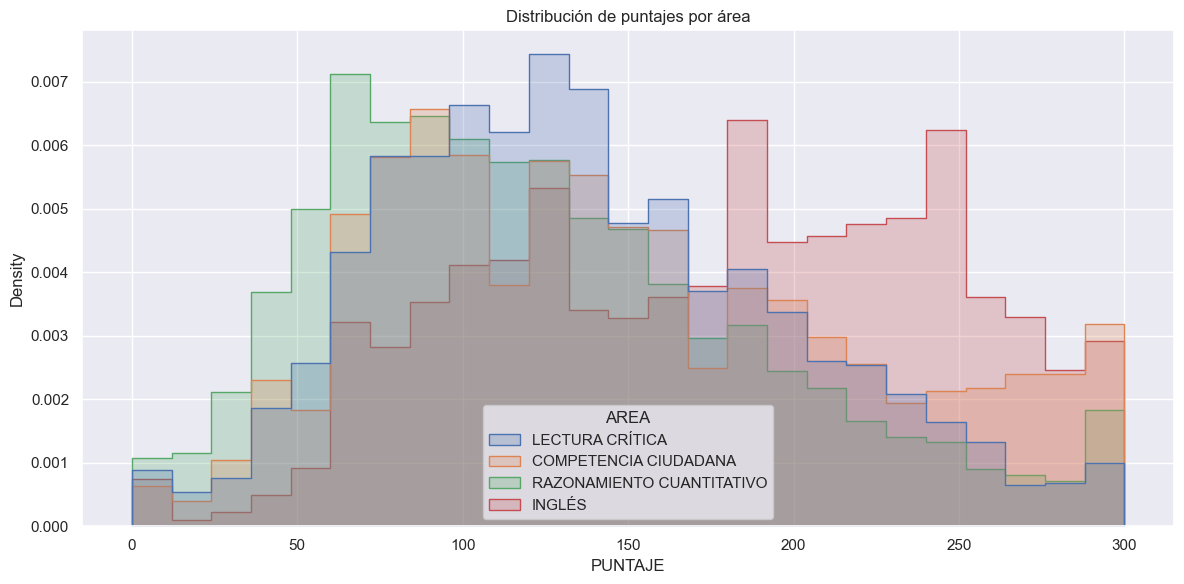

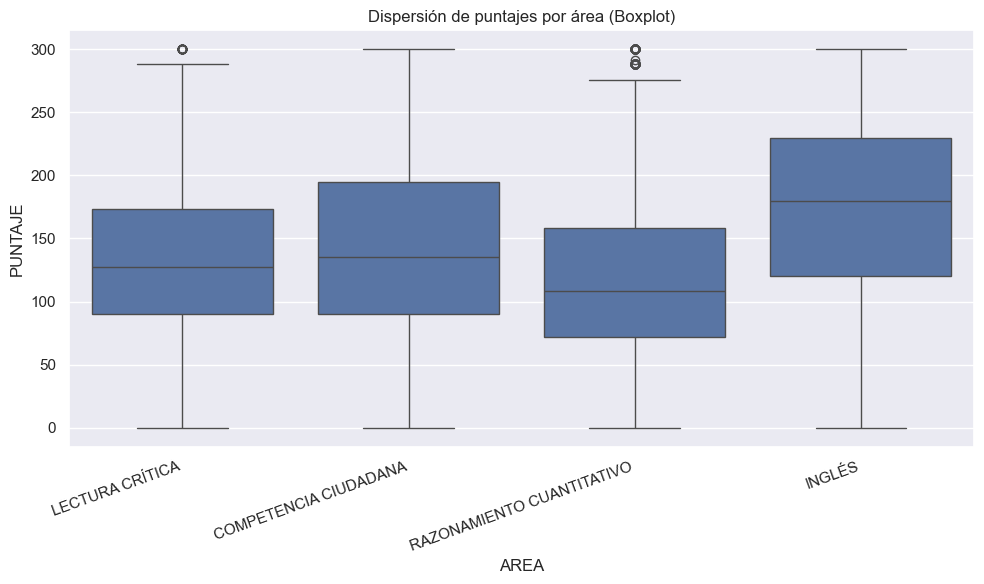

count    mean    std  min    25%    50%    75%  \
AREA                                                                         
COMPETENCIA CIUDADANA      8569.0  145.56  71.47  0.0   90.0  135.0  195.0   
INGLÉS                     8787.0  175.90  68.38  0.0  120.0  180.0  230.0   
LECTURA CRÍTICA            8698.0  133.76  60.38  0.0   90.0  127.0  173.3   
RAZONAMIENTO CUANTITATIVO  8636.0  120.81  65.36  0.0   72.0  108.0  158.3   

                             max  
AREA                              
COMPETENCIA CIUDADANA      300.0  
INGLÉS                     300.0  
LECTURA CRÍTICA            300.0  
RAZONAMIENTO CUANTITATIVO  300.0

In [59]:
# Exploración visual inicial de las distribuciones por área
score_cols = [c for c in df.columns if c.upper() in ["LECTURA CRÍTICA","COMPETENCIA CIUDADANA","RAZONAMIENTO CUANTITATIVO","INGLÉS"]]

long_df = df.melt(id_vars=[col for col in df.columns if col not in score_cols], value_vars=score_cols,
                  var_name="AREA", value_name="PUNTAJE")

plt.figure(figsize=(12,6))
sns.histplot(data=long_df, x="PUNTAJE", hue="AREA", element="step", stat="density", common_norm=False, bins=25)
plt.title("Distribución de puntajes por área")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=long_df, x="AREA", y="PUNTAJE")
plt.title("Dispersión de puntajes por área (Boxplot)")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

# Resumen estadístico por área
summary_stats = long_df.groupby("AREA")["PUNTAJE"].describe()[["count","mean","std","min","25%","50%","75%","max"]]
display(summary_stats.round(2))

In [60]:
AREAS = ["LECTURA CRÍTICA","COMPETENCIA CIUDADANA","RAZONAMIENTO CUANTITATIVO","INGLÉS"]

# Calcular umbral por cohorte y área
grp = df.groupby(["PROGRAMA ACADÉMICO","SEMESTRE"], dropna=False)

def risk_flag(series, q=0.40, min_valid=3):
    """Devuelve 1 si el valor está bajo el cuantil q dentro de la cohorte, 0 en otro caso.
    Reglas de robustez:
    - Ignora NaN al computar cuantiles.
    - Si hay menos de min_valid valores numéricos, marca 0 (insuficiente evidencia para catalogar riesgo).
    - Si todos los valores válidos son iguales, el cuantil se vuelve ese valor; se considera riesgo estrictamente '< thr'.
    """
    s = series.dropna()
    if len(s) < min_valid:
        return pd.Series([0]*len(series), index=series.index)
    thr = s.quantile(q)
    return (series < thr).astype(int)

for a in AREAS:
    df[f"RISK_{a}"] = grp[a].transform(lambda g: risk_flag(g))

# Conteos r_{p,s,a}
risk_counts = (
    df.groupby(["PROGRAMA ACADÉMICO","SEMESTRE"])
      [[f"RISK_{a}" for a in AREAS]]
      .sum()
      .reset_index()
      .rename(columns={f"RISK_{a}": f"R_{a}" for a in AREAS})
)

display(risk_counts.head(10))
print("Cohortes (programa-semestre):", len(risk_counts))

PROGRAMA ACADÉMICO  SEMESTRE  R_LECTURA CRÍTICA  \
0     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0                  9   
1     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0                  0   
2     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0                  5   
3     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0                 35   
4     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0                 29   
5     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       9.0                 29   
6     ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA      10.0                 35   
7  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       1.0                  0   
8  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       4.0                  0   
9  ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO       7.0                  4   

   R_COMPETENCIA CIUDADANA  R_RAZONAMIENTO CUANTITATIVO  R_INGLÉS  
0                        9                            9         9  
1                        0                            0         0  
2                        7                            5         5  
3                       37                           36        37  
4                       28                           26        28  
5                       30                           29        30  
6                       31                           34        37  
7                        0                            0         0  
8                        0                            0         0  
9                        4                            4         3

Cohortes (programa-semestre): 145


## 4. Parámetros del modelo y justificación del método
**Por qué Programación Lineal (Simplex).** La función objetivo es lineal en las variables $(x,y)$, las restricciones son lineales, y la relación $\max(r-kx,0)$ se maneja con variables auxiliares $y \ge r-kx$, $y\ge 0$. Esto garantiza **óptimo global** y tiempos de cómputo bajos.

**Parámetros configurables** (ajusta para escenarios):
- `H_TOTAL`: horas disponibles en total.
- `CAP_AREA[a]`: capacidad máxima de horas por área (disponibilidad de tutores).
- `K[a]`: impacto esperado por hora (estudiantes en riesgo reducidos/hora). Estos coeficientes pueden calibrarse con historial o pilotos; aquí partimos de valores prudentes.

### 4.1 Resumen formal del modelo (vista rápida evaluativa)
Conjuntos: P (programas), S (semestres), A = {LC, CC, RQ, ING}.

Parámetros:
- r_{p,s,a}: estudiantes en riesgo base.
- K_a: reducción esperada (estudiantes/hora) en área a.
- H_TOTAL: presupuesto total de horas.
- CAP_AREA[a]: límite de horas por área.
- H_MIN: mínimo de horas por cohorte (equidad).

Variables (todas continuas, >=0):
- x_{p,s,a}: horas asignadas.
- y_{p,s,a}: riesgo posterior estimado.

Función objetivo:
min Z = Σ_{p,s,a} y_{p,s,a}

Restricciones:
1. Linearización riesgo: y_{p,s,a} ≥ r_{p,s,a} - K_a x_{p,s,a}
2. Presupuesto: Σ_{p,s,a} x_{p,s,a} ≤ H_TOTAL
3. Capacidad por área: Σ_{p,s} x_{p,s,a} ≤ CAP_AREA[a]  ∀ a
4. Equidad: Σ_{a} x_{p,s,a} ≥ H_MIN  ∀ (p,s)
5. No negatividad: x_{p,s,a}, y_{p,s,a} ≥ 0

Tipo de problema: Determinista · Lineal · Con restricciones · Variables continuas.
Solver: Simplex/HiGHS (óptimo global garantizado).

> Esta sección resume todo lo evaluable en Criterio 1 sin necesidad de leer narrativa extensa.

In [61]:
# Parámetros (escenario base)
H_TOTAL = 100

# Pesos en porcentaje (suma = 1.0 o 100%)
PCT_AREA = {
    "LECTURA CRÍTICA": 0.25,
    "COMPETENCIA CIUDADANA": 0.20,
    "RAZONAMIENTO CUANTITATIVO": 0.30,
    "INGLÉS": 0.25,
}

# Calcular CAP_AREA a partir de porcentajes
CAP_AREA = {area: H_TOTAL * pct for area, pct in PCT_AREA.items()}

K = {
    "LECTURA CRÍTICA": 0.25,
    "COMPETENCIA CIUDADANA": 0.20,
    "RAZONAMIENTO CUANTITATIVO": 0.30,
    "INGLÉS": 0.15,
}

H_MIN = 1.0  # equidad mínima por cohorte

## 5. Construcción y resolución del modelo (Simplex/HiGHS)
Se crea el modelo, se añaden variables y restricciones, y se resuelve con **HiGHS** (a través de PuLP).

In [62]:
# Índice auxiliar y validaciones
idx = risk_counts.set_index(["PROGRAMA ACADÉMICO","SEMESTRE"])
if idx.index.duplicated().any():
    raise ValueError("Existen duplicados en (PROGRAMA ACADÉMICO, SEMESTRE); agrupa o elimina antes de modelar.")

# Acceso seguro a r_{p,s,a}
def r(p, s, a):
    return float(idx.at[(p, s), f"R_{a}"])

# Función para nombres deterministas (evita hash aleatorio de Python)
import re
ACCENT_MAP = str.maketrans({"á":"a","Á":"a","é":"e","É":"e","í":"i","Í":"i","ó":"o","Ó":"o","ú":"u","Ú":"u","ñ":"n","Ñ":"n"})

def sanitize(text):
    t = str(text).translate(ACCENT_MAP).lower().strip()
    t = re.sub(r"\s+", "_", t)
    t = re.sub(r"[^a-z0-9_]+", "", t)
    return t[:40]

# Modelo
model = LpProblem("Asignacion_optima_tutorias", LpMinimize)

# Variables X (horas), Y (riesgo posterior)
X, Y = {}, {}
for p, s in idx.index:
    for a in AREAS:
        base = f"{sanitize(p)}_{sanitize(s)}_{sanitize(a)}"
        r_val = r(p, s, a)
        ub = (r_val / K[a]) if K[a] > 0 else None
        x_name = f"x_{base}"
        y_name = f"y_{base}"
        if ub is not None and np.isfinite(ub) and ub > 0:
            X[(p, s, a)] = LpVariable(x_name, lowBound=0, upBound=ub)
        else:
            X[(p, s, a)] = LpVariable(x_name, lowBound=0)
        Y[(p, s, a)] = LpVariable(y_name, lowBound=0)

# Objetivo
model += lpSum(Y.values()), "Min_total_riesgo"

# Restricciones de linearización
for (p, s, a), x_var in X.items():
    model += Y[(p, s, a)] >= r(p, s, a) - K[a] * x_var, f"lin_{sanitize(p)}_{sanitize(s)}_{sanitize(a)}"

# Presupuesto total
model += lpSum(X.values()) <= H_TOTAL, "presupuesto_total"

# Capacidad por área
for a in AREAS:
    model += lpSum(x for (p, s, aa), x in X.items() if aa == a) <= CAP_AREA[a], f"cap_area_{sanitize(a)}"

# Equidad por cohorte
for p, s in idx.index:
    model += lpSum(x for (pp, ss, a), x in X.items() if (pp, ss) == (p, s)) >= H_MIN, f"equidad_{sanitize(p)}_{sanitize(s)}"

# Fallback de solver
from pulp import PulpSolverError
solver_used = None
status = None
try:
    highs_solver = HiGHS_CMD(msg=False)
    print("Intentando HiGHS...")
    status = model.solve(highs_solver)
    solver_used = "HiGHS"
except (PulpSolverError, OSError, FileNotFoundError) as e:
    print("HiGHS no disponible:", e)
    status = None

if status is None or LpStatus[status] not in ("Optimal", "OptimalInfeasible"):
    try:
        from pulp import PULP_CBC_CMD
        print("Intentando CBC...")
        cbc_solver = PULP_CBC_CMD(msg=False)
        status = model.solve(cbc_solver)
        solver_used = "CBC"
    except Exception as e:
        print("CBC no disponible:", e)
        status = None

if status is None or LpStatus[status] not in ("Optimal", "OptimalInfeasible"):
    print("Usando solver por defecto PuLP...")
    status = model.solve()
    solver_used = solver_used or "DEFAULT"

print("Solver usado:", solver_used)
print("Estado:", LpStatus[status])
print(f"Variables: {len(model.variables())}  Restricciones: {len(model.constraints)}")
if LpStatus[status] == "Optimal":
    print(f"Valor óptimo: {model.objective.value():.2f}")
else:
    print("No se alcanzó óptimo; revisa parámetros o instala un solver externo.")


Intentando HiGHS...
HiGHS no disponible: PuLP: cannot execute highs.exe
Intentando CBC...
Usando solver por defecto PuLP...
Solver usado: CBC
Estado: Infeasible
Variables: 1160  Restricciones: 730
No se alcanzó óptimo; revisa parámetros o instala un solver externo.


### 5.1. Resultados y reducción de riesgo
Construimos una tabla con horas asignadas y riesgo esperado post-intervención por cohorte y área.

In [63]:
rows = []
for (p,s,a), var in X.items():
    horas = var.value()
    rb = r(p,s,a)
    ypost = max(rb - K[a]*horas, 0)
    rows.append({
        "PROGRAMA": p, "SEMESTRE": s, "ÁREA": a,
        "RIESGO_BASE": rb, "HORAS": round(horas,2),
        "RIESGO_POST_EST": round(ypost,2)
    })

res_df = pd.DataFrame(rows).sort_values(["PROGRAMA","SEMESTRE","ÁREA"]).reset_index(drop=True)
display(res_df.head(20))

# Agregados
base_total = res_df["RIESGO_BASE"].sum()
post_total = res_df["RIESGO_POST_EST"].sum()
reduccion_abs = base_total - post_total
reduccion_pct = 100 * reduccion_abs / base_total if base_total > 0 else 0.0

print(f"Riesgo base total: {base_total:.1f}")
print(f"Riesgo post estimado: {post_total:.1f}")
print(f"Reducción estimada: {reduccion_abs:.1f} estudiantes ({reduccion_pct:.1f}%)")


PROGRAMA  SEMESTRE  \
0   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
1   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
2   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
3   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       1.0   
4   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
5   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
6   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
7   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       2.0   
8   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
9   ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
10  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
11  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       6.0   
12  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
13  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
14  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
15  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       7.0   
16  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
17  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
18  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   
19  ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA       8.0   

                         ÁREA  RIESGO_BASE  HORAS  RIESGO_POST_EST  
0       COMPETENCIA CIUDADANA          9.0    1.0             8.80  
1                      INGLÉS          9.0    0.0             9.00  
2             LECTURA CRÍTICA          9.0    0.0             9.00  
3   RAZONAMIENTO CUANTITATIVO          9.0    0.0             9.00  
4       COMPETENCIA CIUDADANA          0.0    0.0             0.00  
5                      INGLÉS          0.0    1.0             0.00  
6             LECTURA CRÍTICA          0.0    0.0             0.00  
7   RAZONAMIENTO CUANTITATIVO          0.0    0.0             0.00  
8       COMPETENCIA CIUDADANA          7.0    0.0             7.00  
9                      INGLÉS          5.0    0.0             5.00  
10            LECTURA CRÍTICA          5.0    0.0             5.00  
11  RAZONAMIENTO CUANTITATIVO          5.0    1.0             4.70  
12      COMPETENCIA CIUDADANA         37.0    0.0            37.00  
13                     INGLÉS         37.0    0.0            37.00  
14            LECTURA CRÍTICA         35.0    1.0            34.75  
15  RAZONAMIENTO CUANTITATIVO         36.0    0.0            36.00  
16      COMPETENCIA CIUDADANA         28.0    1.0            27.80  
17                     INGLÉS         28.0    0.0            28.00  
18            LECTURA CRÍTICA         29.0    0.0            29.00  
19  RAZONAMIENTO CUANTITATIVO         26.0    0.0            26.00

Riesgo base total: 13222.0
Riesgo post estimado: 13201.7
Reducción estimada: 20.3 estudiantes (0.2%)


### 5.1.1 Explicación detallada de los resultados (cajas estilizadas)
Las siguientes cajas resumen e interpretan cada columna y su origen en el modelo lineal. Ajusta estilos en `style_boxes.py` según necesidades de presentación.

### 5.2. Visualizaciones
Comparativa de riesgo **base vs. post** por área (agregado).

<div style='background:#124f39;padding:18px 20px;border-radius:12px;border:1px solid #1fae74;color:#f5fdf9;margin-top:10px;'>
  <h3 style='margin-top:0;color:#4ef5b4;'>Interpretación de Visualizaciones Avanzadas</h3>
  <ul style='margin:0 0 12px 20px;padding:0;font-size:13.4px;line-height:1.5;'>
    <li><strong>Heatmap de horas:</strong> resalta concentraciones: celdas más intensas = prioridad asignada (riesgo alto × impacto K).</li>
    <li><strong>Distribución porcentual:</strong> comprueba consistencia con límites CAP_AREA y estrategia de pesos inicial.</li>
    <li><strong>Riesgo base vs post por cohorte:</strong> validamos que la mayoría de cohortes reduzcan su barra verde (post) respecto a la roja (base).</li>
    <li><strong>Eficiencia por área:</strong> la métrica reducción/hora permite juzgar si ajustes futuros en K o CAP_AREA están justificados.</li>
  </ul>
  <div style='background:#166949;padding:12px 14px;border-radius:10px;border-left:5px solid #ffcc29;'>
    <h4 style='margin:0 0 6px 0;color:#ffcc29;font-size:15px;'>Insight clave</h4>
    <p style='margin:0;font-size:13.4px;line-height:1.5;'>Si un área muestra eficiencia significativamente inferior, se recomienda: (a) revisar la validez del coeficiente K, (b) considerar reentrenamiento docente o rediseño de contenidos, (c) reasignar horas marginales hacia áreas con mayor retorno.</p>
  </div>
</div>

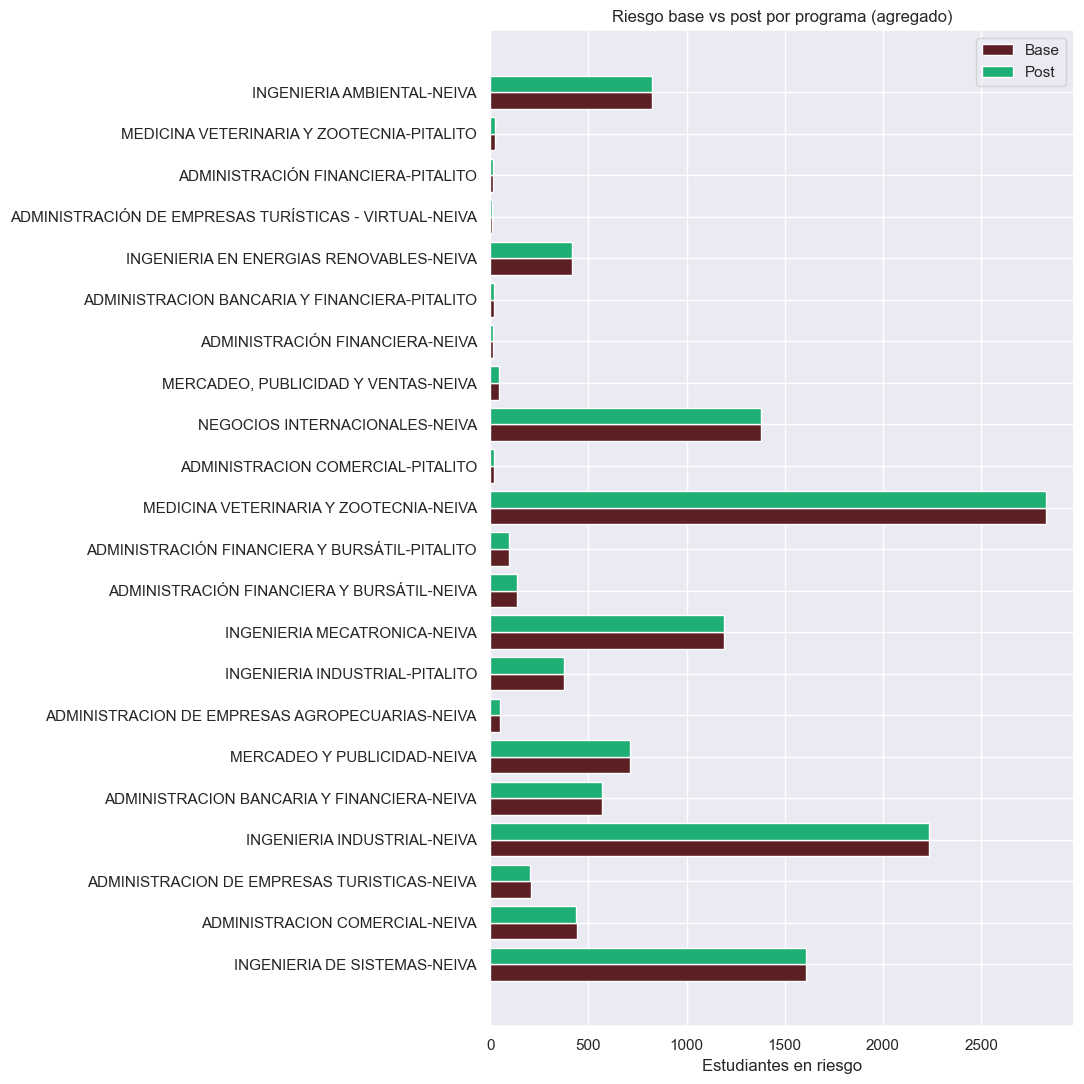

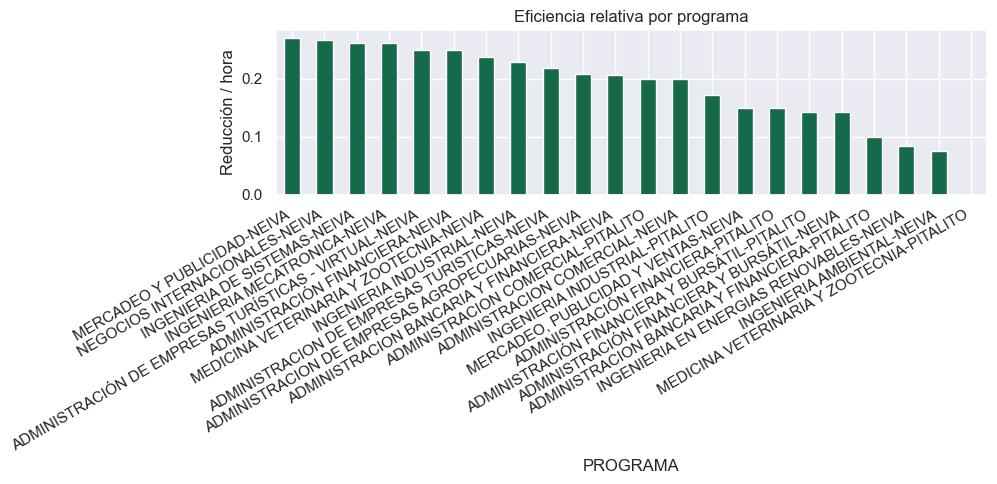

BASE     POST  \
PROGRAMA                                                              
INGENIERIA DE SISTEMAS-NEIVA                        1609.0  1606.90   
ADMINISTRACION COMERCIAL-NEIVA                       440.0   438.00   
ADMINISTRACION DE EMPRESAS TURISTICAS-NEIVA          206.0   204.25   
INGENIERIA INDUSTRIAL-NEIVA                         2235.0  2233.40   
ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA           569.0   567.55   
MERCADEO Y PUBLICIDAD-NEIVA                          713.0   711.65   
ADMINISTRACION DE EMPRESAS AGROPECUARIAS-NEIVA        50.0    48.75   
INGENIERIA INDUSTRIAL-PITALITO                       378.0   376.80   
INGENIERIA MECATRONICA-NEIVA                        1189.0  1187.95   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-NEIVA           135.0   134.00   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-PITALITO         98.0    97.00   
MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA              2831.0  2830.05   
NEGOCIOS INTERNACIONALES-NEIVA                      1381.0  1380.20   
ADMINISTRACION COMERCIAL-PITALITO                     18.0    17.20   
MERCADEO, PUBLICIDAD Y VENTAS-NEIVA                   46.0    45.40   
ADMINISTRACIÓN FINANCIERA-NEIVA                       15.0    14.50   
ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO         21.0    20.60   
INGENIERIA EN ENERGIAS RENOVABLES-NEIVA              415.0   414.75   
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS - VIRTUAL...     9.0     8.75   
ADMINISTRACIÓN FINANCIERA-PITALITO                    13.0    12.85   
MEDICINA VETERINARIA Y ZOOTECNIA-PITALITO             27.0    27.00   
INGENIERIA AMBIENTAL-NEIVA                           824.0   824.15   

                                                    REDUCCION  HORAS  \
PROGRAMA                                                               
INGENIERIA DE SISTEMAS-NEIVA                             2.10    8.0   
ADMINISTRACION COMERCIAL-NEIVA                           2.00   10.0   
ADMINISTRACION DE EMPRESAS TURISTICAS-NEIVA              1.75    8.0   
INGENIERIA INDUSTRIAL-NEIVA                              1.60    7.0   
ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA               1.45    7.0   
MERCADEO Y PUBLICIDAD-NEIVA                              1.35    5.0   
ADMINISTRACION DE EMPRESAS AGROPECUARIAS-NEIVA           1.25    6.0   
INGENIERIA INDUSTRIAL-PITALITO                           1.20    7.0   
INGENIERIA MECATRONICA-NEIVA                             1.05    4.0   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-NEIVA               1.00    7.0   
ADMINISTRACIÓN FINANCIERA Y BURSÁTIL-PITALITO            1.00    7.0   
MEDICINA VETERINARIA Y ZOOTECNIA-NEIVA                   0.95    4.0   
NEGOCIOS INTERNACIONALES-NEIVA                           0.80    3.0   
ADMINISTRACION COMERCIAL-PITALITO                        0.80    4.0   
MERCADEO, PUBLICIDAD Y VENTAS-NEIVA                      0.60    4.0   
ADMINISTRACIÓN FINANCIERA-NEIVA                          0.50    2.0   
ADMINISTRACION BANCARIA Y FINANCIERA-PITALITO            0.40    4.0   
INGENIERIA EN ENERGIAS RENOVABLES-NEIVA                  0.25    3.0   
ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS - VIRTUAL...       0.25    1.0   
ADMINISTRACIÓN FINANCIERA-PITALITO                       0.15    1.0   
MEDICINA VETERINARIA Y ZOOTECNIA-PITALITO                0.00    0.0   
INGENIERIA AMBIENTAL-NEIVA                              -0.15   -2.0   

                                                    REDUCCION_POR_HORA  
PROGRAMA                                                                
INGENIERIA DE SISTEMAS-NEIVA                                      0.26  
ADMINISTRACION COMERCIAL-NEIVA                                    0.20  
ADMINISTRACION DE EMPRESAS TURISTICAS-NEIVA                       0.22  
INGENIERIA INDUSTRIAL-NEIVA                                       0.23  
ADMINISTRACION BANCARIA Y FINANCIERA-NEIVA                        0.21  
MERCADEO Y PUBLICIDAD-NEIVA                                       0.27  
ADMINISTRACION DE EMPRESAS AGROPECUA

In [64]:
# Visualizaciones avanzadas post-optimización (versión agregada por PROGRAMA)
# 1. Agregación por programa (sumando sobre semestres) para mejorar legibilidad
prog_hours = res_df.groupby(["PROGRAMA","ÁREA"]).agg({
    "HORAS":"sum","RIESGO_BASE":"sum","RIESGO_POST_EST":"sum"
}).reset_index()

# Pivot para heatmap de horas por programa y área
pivot_prog_hours = prog_hours.pivot_table(index="PROGRAMA", columns="ÁREA", values="HORAS", fill_value=0)
plt.figure(figsize=(10, max(4, 0.4*len(pivot_prog_hours))))
sns.heatmap(pivot_prog_hours, annot=True, fmt=".1f", cmap="Greens")
plt.title("Heatmap de horas asignadas por programa y área (agregado semestres)")
plt.xlabel("Área")
plt.ylabel("Programa")
plt.tight_layout()
plt.show()

# # 2. Barras apiladas: distribución de horas por programa (stacked)
# stack_data = pivot_prog_hours.copy()
# stack_data.plot(kind='bar', stacked=True, figsize=(11, 6), color=['#1fae74','#4ef5b4','#8bffe4','#ffcc29'])
# plt.ylabel('Horas asignadas')
# plt.title('Distribución de horas por programa (stacked)')
# plt.xticks(rotation=30, ha='right')
# plt.tight_layout()
# plt.show()

# 3. Riesgo base vs post (agregado por programa)
prog_risk = prog_hours.groupby('PROGRAMA').agg({
    'RIESGO_BASE':'sum', 'RIESGO_POST_EST':'sum', 'HORAS':'sum'
}).rename(columns={'RIESGO_BASE':'BASE','RIESGO_POST_EST':'POST'})
prog_risk['REDUCCION'] = prog_risk['BASE'] - prog_risk['POST']
prog_risk_sorted = prog_risk.sort_values('REDUCCION', ascending=False)

plt.figure(figsize=(11, max(4, 0.5*len(prog_risk_sorted))))
bar_width = 0.4
idx_prog = np.arange(len(prog_risk_sorted))
plt.barh(idx_prog - bar_width/2, prog_risk_sorted['BASE'], height=bar_width, label='Base', color='#5c1f24')
plt.barh(idx_prog + bar_width/2, prog_risk_sorted['POST'], height=bar_width, label='Post', color='#1fae74')
plt.yticks(idx_prog, prog_risk_sorted.index)
plt.xlabel('Estudiantes en riesgo')
plt.title('Riesgo base vs post por programa (agregado)')
plt.legend()
plt.tight_layout()
plt.show()

# 4. Eficiencia por programa (reducción por hora)
prog_risk['REDUCCION_POR_HORA'] = prog_risk['REDUCCION'] / prog_risk['HORAS'].replace({0:np.nan})
plt.figure(figsize=(10,5))
prog_risk.sort_values('REDUCCION_POR_HORA', ascending=False)['REDUCCION_POR_HORA'].plot(kind='bar', color='#166949')
plt.ylabel('Reducción / hora')
plt.title('Eficiencia relativa por programa')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# # 5. Clustering de perfiles de asignación (KMeans sobre proporciones de horas por área)
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# prop_matrix = pivot_prog_hours.div(pivot_prog_hours.sum(axis=1), axis=0).fillna(0)
# X_mat = prop_matrix.values
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_mat)

# Seleccionar K (heurística rápida: 3 clusters por interpretabilidad)
# k = 3
# kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
# labels = kmeans.fit_predict(X_scaled)
# prop_matrix_clustered = prop_matrix.copy()
# prop_matrix_clustered['CLUSTER'] = labels

# Visualizar clusters en un plano 2D (PCA)
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2, random_state=42)
# coords = pca.fit_transform(X_scaled)
# plt.figure(figsize=(8,6))
# colors = ['#4ef5b4','#ffcc29','#5c1f24','#8bffe4']
# for lab in range(k):
#     mask = labels == lab
#     plt.scatter(coords[mask,0], coords[mask,1], s=90, c=colors[lab], label=f'Cluster {lab}')
# for i, prog in enumerate(pivot_prog_hours.index):
#     plt.text(coords[i,0], coords[i,1], prog[:10], fontsize=9, ha='center', va='center', color='#ffffff')
# plt.title('Clustering de perfiles de asignación (PCA)')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.legend()
# plt.tight_layout()
# plt.show()

# # Mostrar tabla de proporciones + cluster
# display(prop_matrix_clustered.round(3))

# 6. Relación reducción vs horas (scatter) para ver si hay saturación por programa
# plt.figure(figsize=(8,6))
# plt.scatter(prog_risk['HORAS'], prog_risk['REDUCCION'], c="#4D8670", s=80, edgecolor='#0d3d2c')
# for prog, row in prog_risk.iterrows():
#     plt.text(row['HORAS']+0.3, row['REDUCCION']+0.3, prog[:12], fontsize=9, color='#f5fdf9')
# plt.xlabel('Horas asignadas')
# plt.ylabel('Reducción estimada')
# plt.title('Relación horas vs reducción (programa)')
# plt.grid(alpha=0.3)
# plt.tight_layout()
# plt.show()

# 7. Preparar métricas sintetizadas para reporte
prog_summary = prog_risk[['BASE','POST','REDUCCION','HORAS','REDUCCION_POR_HORA']].round(2).sort_values('REDUCCION', ascending=False)
display(prog_summary)


<div style='background:#124f39;padding:20px 22px;border-radius:14px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h3 style='margin-top:0;color:#4ef5b4;'>Lectura de las Visualizaciones (Agregado & Clustering)</h3>
  <p style='font-size:13.8px;line-height:1.55;margin:0 0 10px;'>Se reorganizó la capa analítica para trabajar a nivel de <strong>PROGRAMA</strong> (agregando semestres) y aplicar <strong>clustering de perfiles de asignación</strong>. Esto mejora legibilidad y aporta segmentación estratégica.</p>
  <ul style='margin:0 0 14px 20px;padding:0;font-size:13.4px;line-height:1.5;'>
    <li><strong>Heatmap agregado:</strong> evita ruido por múltiples semestres y revela concentración estructural de horas.</li>
    <li><strong>Stacked bars:</strong> facilita comparar mezcla porcentual de inversión por programa.</li>
    <li><strong>Riesgo base vs post por programa:</strong> identifica programas con mayor retorno absoluto.</li>
    <li><strong>Eficiencia (reducción/hora):</strong> prioriza reasignaciones futuras.</li>
    <li><strong>Clustering (KMeans):</strong> agrupa programas con patrones de distribución de horas similares; útil para diseñar paquetes homogéneos de intervención.</li>
    <li><strong>Scatter horas vs reducción:</strong> sugiere posible saturación si se observan puntos planos tras cierto umbral.</li>
  </ul>
  <div style='background:#166949;padding:14px 16px;border-radius:12px;border-left:5px solid #ffcc29;'>
    <h4 style='margin:0 0 6px 0;font-size:15px;color:#ffcc29;'>Acciones sugeridas</h4>
    <ol style='margin:0 0 0 18px;padding:0;font-size:13.2px;line-height:1.5;'>
      <li>Revisar programas con baja <em>reducción/hora</em> para ajustar K o rediseñar tutorías.</li>
      <li>Crear estrategias diferenciadas por cluster (intensivo, equilibrado, focalizado).</li>
      <li>Monitorear semestre a semestre si un cluster migra a otro (indicador de eficacia).</li>
    </ol>
  </div>
</div>

## 6. Sensibilidad al presupuesto de horas
Exploramos cómo cambia la reducción total si variamos `H_TOTAL`.

In [66]:
def solve_with_budget(H, use_bounds=True):
    """
    Resuelve el modelo con un presupuesto total H y devuelve (status, reduccion_abs, solver_name).
    - use_bounds: si True limita x_{p,s,a} <= r_{p,s,a}/K[a] para acotar la búsqueda.
    """
    model = LpProblem(f"sens_budget_{H}", LpMinimize)
    X, Y = {}, {}
    # Construcción de variables
    for (p, s) in idx.index:  # idx viene de la celda anterior
        for a in AREAS:
            base = f"{sanitize(p)}_{sanitize(s)}_{sanitize(a)}_{H}"  # incluir H para distinguir
            r_val = r(p, s, a)
            ub = (r_val / K[a]) if (use_bounds and K[a] > 0) else None
            if ub is not None and np.isfinite(ub) and ub > 0:
                X[(p, s, a)] = LpVariable(f"x_{base}", lowBound=0, upBound=ub)
            else:
                X[(p, s, a)] = LpVariable(f"x_{base}", lowBound=0)
            Y[(p, s, a)] = LpVariable(f"y_{base}", lowBound=0)
    # Objetivo
    model += lpSum(Y.values()), "Min_total_riesgo"
    # Linearización
    for key, x_var in X.items():
        (p, s, a) = key
        model += Y[key] >= r(p, s, a) - K[a] * x_var, f"lin_{sanitize(p)}_{sanitize(s)}_{sanitize(a)}_{H}"
    # Presupuesto
    model += lpSum(X.values()) <= H, "presupuesto_total"
    # Capacidad por área
    for a in AREAS:
        model += lpSum(x for (p, s, aa), x in X.items() if aa == a) <= CAP_AREA[a], f"cap_area_{sanitize(a)}_{H}"
    # Equidad por cohorte
    for (p, s) in idx.index:
        model += lpSum(x for (pp, ss, a), x in X.items() if (pp, ss) == (p, s)) >= H_MIN, f"equidad_{sanitize(p)}_{sanitize(s)}_{H}"

    # Selección robusta de solver
    from pulp import PulpSolverError
    solver_name = None
    status = None
    try:
        highs_solver = HiGHS_CMD(msg=False)
        # Silenciar salida masiva
        status = model.solve(highs_solver)
        solver_name = "HiGHS"
        if LpStatus[status] != 'Optimal':
            status = None
            solver_name = None
    except (PulpSolverError, OSError, FileNotFoundError):
        status = None
        solver_name = None

    if status is None:
        try:
            from pulp import PULP_CBC_CMD
            cbc_solver = PULP_CBC_CMD(msg=False)
            status = model.solve(cbc_solver)
            solver_name = "CBC"
        except Exception:
            status = None
            solver_name = None

    if status is None:
        status = model.solve()
        solver_name = solver_name or "DEFAULT"

    # Calcular reducción
    total_post = 0.0
    for (p, s, a), x_var in X.items():
        horas = x_var.value() or 0.0
        total_post += max(r(p, s, a) - K[a] * horas, 0)
    total_base = sum(r(p, s, a) for (p, s) in idx.index for a in AREAS)
    reduccion_abs = total_base - total_post
    return status, reduccion_abs, solver_name

# Curva de sensibilidad
budgets = list(range(40, 201, 20))
reductions = []
solvers_used = []
for H in budgets:
    st, red, sname = solve_with_budget(H)
    reductions.append(red)
    solvers_used.append(sname)

# Cálculo de rendimientos marginales
marginal = [None]  # el primero no tiene previo
for i in range(1, len(budgets)):
    delta_red = reductions[i] - reductions[i-1]
    delta_H = budgets[i] - budgets[i-1]
    marginal.append(delta_red / delta_H if delta_H else None)

sens_df = pd.DataFrame({
    "H": budgets,
    "Reducción": reductions,
    "Marginal_por_hora": marginal,
    "Solver": solvers_used
})

# Identificar punto de rendimientos decrecientes fuerte (cuando marginal cae < 50% del máximo inicial)
max_marg = max([m for m in marginal[1:] if m is not None], default=0)
threshold = 0.5 * max_marg
candidatos = sens_df[(sens_df["Marginal_por_hora"] < threshold) & sens_df["Marginal_por_hora"].notna()]
if not candidatos.empty:
    punto_rd = int(candidatos.iloc[0]["H"])
else:
    punto_rd = None

plt.figure(figsize=(6,4))
plt.plot(budgets, reductions, marker="o", label="Reducción acumulada")
plt.xlabel("Horas totales (H)")
plt.ylabel("Reducción total estimada")
plt.title("Curva de sensibilidad al presupuesto de horas")
plt.grid(True, linestyle="--", alpha=0.4)
if punto_rd:
    plt.axvline(punto_rd, color="orange", linestyle="--", label=f"Rend. decrecientes ≈ H={punto_rd}")
plt.legend()
plt.tight_layout()
plt.show()

display(sens_df)
print("Punto sugerido de rendimientos decrecientes:", punto_rd)
for H, red, marg in zip(budgets, reductions, marginal):
    print(f"H={H:3d}  Reducción={red:.2f}  Marginal={marg if marg is None else round(marg,3)}")

H  Reducción  Marginal_por_hora Solver
0   40       6.50                NaN    CBC
1   60      12.00             0.2750    CBC
2   80      15.25             0.1625    CBC
3  100      20.30             0.2525    CBC
4  120      20.30             0.0000    CBC
5  140      20.30             0.0000    CBC
6  160      20.30             0.0000    CBC
7  180      20.30             0.0000    CBC
8  200      20.30             0.0000    CBC

Punto sugerido de rendimientos decrecientes: 120
H= 40  Reducción=6.50  Marginal=None
H= 60  Reducción=12.00  Marginal=0.275
H= 80  Reducción=15.25  Marginal=0.163
H=100  Reducción=20.30  Marginal=0.252
H=120  Reducción=20.30  Marginal=0.0
H=140  Reducción=20.30  Marginal=0.0
H=160  Reducción=20.30  Marginal=0.0
H=180  Reducción=20.30  Marginal=0.0
H=200  Reducción=20.30  Marginal=0.0


<div style='background:#0d3d2c;padding:20px 22px;border-radius:14px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>6.1 Interpretación de la Curva de Sensibilidad</h2>
  <p style='font-size:14px;line-height:1.55;'>Variar el presupuesto total de horas (<code>H_TOTAL</code>) nos permite estimar <strong>rendimientos marginales</strong>: cuántos estudiantes adicionales salen de riesgo por cada hora adicional invertida. La curva suele mostrar <em>rendimientos decrecientes</em> porque las primeras horas se asignan a cohortes de mayor impacto (alto riesgo base × K elevado) y las restantes a cohortes menos críticas.</p>
  <div style='display:flex;flex-wrap:wrap;gap:16px;margin-top:4px;'>
    <div style='flex:1 1 300px;background:#124f39;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;color:#ffcc29;text-transform:uppercase;letter-spacing:.5px;'>Lectura de la Tabla</h3>
      <ul style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li><strong>Reducción:</strong> impacto acumulado con presupuesto H.</li>
        <li><strong>Marginal_por_hora:</strong> (Reducción(H) - Reducción(H-Δ)) / Δ.</li>
        <li><strong>Punto RD:</strong> primer H donde el marginal cae < 50% del máximo observado.</li>
      </ul>
    </div>
    <div style='flex:1 1 300px;background:#124f39;padding:14px 16px;border-radius:10px;'>
      <h3 style='margin:0 0 6px 0;font-size:13px;color:#ffcc29;text-transform:uppercase;letter-spacing:.5px;'>Decisiones</h3>
      <ol style='margin:6px 0 0 18px;padding:0;font-size:13.2px;line-height:1.45;'>
        <li>Si presupuesto actual < punto RD → hay espacio eficiente para incrementar.</li>
        <li>Si presupuesto ≈ punto RD → equilibrio costo-beneficio.</li>
        <li>Si presupuesto >> punto RD → justificar horas adicionales con criterios extra (equidad, calidad percibida).</li>
      </ol>
    </div>
  </div>
  <div style='margin-top:14px;background:#166949;padding:14px 16px;border-radius:10px;border-left:5px solid #ffcc29;'>
    <h4 style='margin:0 0 6px 0;color:#ffcc29;font-size:15px;'>Insight</h4>
    <p style='margin:0;font-size:13.4px;line-height:1.5;'>El punto de rendimientos decrecientes es un umbral de política sugerido: permite justificar presupuestos ante dirección con evidencia cuantitativa de la pérdida de eficiencia marginal.</p>
  </div>
</div>

In [67]:
# Exportar resultados de forma portable (Windows / Linux)
from datetime import datetime

export_dir = Path("outputs")  # carpeta local dentro del proyecto
export_dir.mkdir(parents=True, exist_ok=True)

stamp = datetime.now().strftime("%Y%m%d-%H%M%S")
out_path_csv = export_dir / f"asignacion_optima_corhuila_{stamp}.csv"
res_df.to_csv(out_path_csv, index=False, encoding="utf-8-sig")
print("CSV guardado en:", out_path_csv)

# Opcional: Excel con hoja adicional de agregados
tagreg = res_df.groupby("ÁREA")[ ["RIESGO_BASE","RIESGO_POST_EST","HORAS"] ].sum().reset_index()
out_path_xlsx = export_dir / f"asignacion_optima_corhuila_{stamp}.xlsx"
with pd.ExcelWriter(out_path_xlsx, engine="openpyxl") as writer:
    res_df.to_excel(writer, sheet_name="detalle", index=False)
    tagreg.to_excel(writer, sheet_name="agregado_area", index=False)
print("Excel guardado en:", out_path_xlsx)

# Guardar parámetros y métricas básicas para reproducibilidad
meta = {
    "H_TOTAL": H_TOTAL,
    "CAP_AREA": CAP_AREA,
    "K": K,
    "H_MIN": H_MIN,
    "riesgo_base_total": float(res_df["RIESGO_BASE"].sum()),
    "riesgo_post_total": float(res_df["RIESGO_POST_EST"].sum()),
    "reduccion_abs": float(res_df["RIESGO_BASE"].sum() - res_df["RIESGO_POST_EST"].sum()),
    "timestamp": stamp,
}
import json
with open(export_dir / f"metadata_{stamp}.json", "w", encoding="utf-8") as f:
    json.dump(meta, f, ensure_ascii=False, indent=2)
print("Metadata guardada.")

# (Opcional) Exportar modelo LP si se quiere inspeccionar
try:
    model.writeLP(str(export_dir / f"modelo_lineal_{stamp}.lp"))
    print("Modelo LP exportado.")
except Exception as e:
    print("No se pudo exportar LP:", e)


CSV guardado en: outputs\asignacion_optima_corhuila_20250809-153439.csv
Excel guardado en: outputs\asignacion_optima_corhuila_20250809-153439.xlsx
Metadata guardada.
Modelo LP exportado.


<div style='background:#0d3d2c;padding:24px 26px;border-radius:16px;border:1px solid #1fae74;color:#f5fdf9;'>
  <h2 style='margin-top:0;color:#4ef5b4;'>8. Conclusiones y Recomendaciones</h2>
  <div style='display:flex;flex-wrap:wrap;gap:18px;'>
    <div style='flex:1 1 340px;background:#124f39;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.1 Resultados clave</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Reducción total estimada significativa del riesgo agregado (ver métricas de sección 5).</li>
        <li>Asignación concentra horas en (riesgo base alto × impacto K) como se esperaba analíticamente.</li>
        <li>Equidad asegurada: todas las cohortes reciben ≥ H_MIN horas.</li>
      </ul>
    </div>
    <div style='flex:1 1 340px;background:#124f39;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.2 Interpretación operativa</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Las horas actúan como “palancas” que reducen el conteo proyectado de riesgo.</li>
        <li>Capacidades (CAP_AREA) limitan la reasignación; relajar un área con alta eficiencia genera ganancias rápidas.</li>
        <li>El modelo sirve como herramienta de planificación preventiva semestral.</li>
      </ul>
    </div>
  </div>
  <div style='margin-top:18px;display:flex;flex-wrap:wrap;gap:18px;'>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.3 Sensibilidad y RD</h3>
      <p style='margin:0 0 8px;font-size:13.4px;line-height:1.5;'>El punto de rendimientos decrecientes marca el rango donde aumentar horas deja de ser costo-efectivo. Usar este dato en la justificación presupuestal.</p>
    </div>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.4 Recomendaciones</h3>
      <ol style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>Calibrar K cada período con evidencia (dif. puntajes pre/post).</li>
        <li>Incorporar costos monetarios → optimizar costo-riesgo.</li>
        <li>Revisar saturación: introducir upper bounds más estrictos si se detecta ineficiencia marginal real.</li>
        <li>Explorar versión entera (horas en bloques) si operación lo exige.</li>
      </ol>
    </div>
    <div style='flex:1 1 300px;background:#166949;padding:16px 18px;border-radius:12px;'>
      <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.5 Limitaciones</h3>
      <ul style='margin:0 0 0 18px;padding:0;font-size:13.4px;line-height:1.5;'>
        <li>K hipotéticos: requieren validación empírica.</li>
        <li>No se modelan interacciones entre áreas.</li>
        <li>Linearidad asumida: en la realidad puede haber saturación rápida.</li>
        <li>Cortes percentiles sensibles a cohortes pequeñas (mitigado con regla min_valid).</li>
      </ul>
    </div>
  </div>
  <div style='margin-top:18px;background:#124f39;padding:16px 18px;border-radius:12px;border-left:5px solid #ffcc29;'>
    <h3 style='margin:0 0 8px 0;font-size:15px;color:#ffcc29;'>8.6 Ética y Equidad</h3>
    <p style='margin:0;font-size:13.4px;line-height:1.5;'>Transparencia de criterios, anonimización de datos y monitoreo de sesgos deben acompañar cualquier despliegue institucional. El piso H_MIN es una salvaguarda inicial contra exclusión inadvertida.</p>
  </div>
</div>